In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.shape

(116058, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [6]:
data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [7]:
data.m13.sum() # total 1 present

636

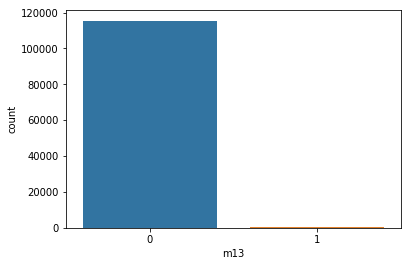

In [8]:
sns.countplot(x="m13",data=data) #unblanced data set

In [9]:
#target, loan deliquency status (0 = non deliquent, 1 = deliquent)  

In [10]:
print("total deliquent",np.count_nonzero(data.m13))
print("total non deliquent",data.shape[0]-np.count_nonzero(data.m13))

print("% data deliquent ",np.count_nonzero(data.m13)/float(data.shape[0])*100)

print("% data non deliquent ",(data.shape[0]-np.count_nonzero(data.m13))/float(data.shape[0])*100)

print("deliquent par non deliquent",np.count_nonzero(data.m13)/float(data.shape[0]-np.count_nonzero(data.m13)))


('total deliquent', 636)
('total non deliquent', 115422)
('% data deliquent ', 0.5480018611383963)
('% data non deliquent ', 99.45199813886161)
('deliquent par non deliquent', 0.005510214690440297)


In [9]:
#data.isnull().sum() there is no null in data set

In [674]:
#data.head()

In [6]:
# cateogrical_columns=['financial_institution',
#  'first_payment_date',
#  'loan_purpose',
#  'origination_date',
#  'source']

In [ ]:
#there are 5 cateogrical value are avaliable in data set

In [ ]:
# EDA

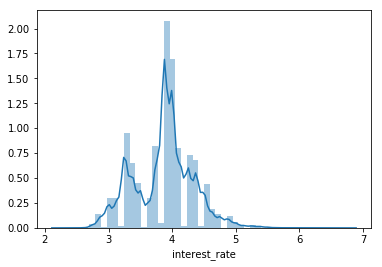

In [9]:
sns.distplot(data.interest_rate)

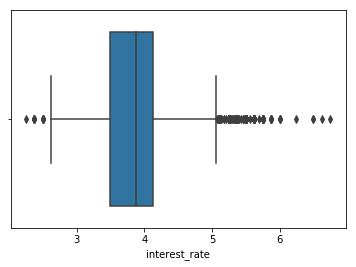

In [11]:
sns.boxplot(data.interest_rate)

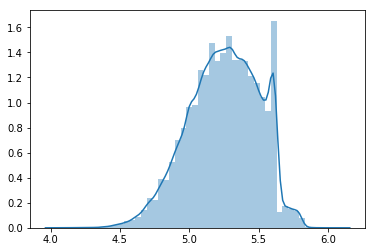

In [18]:
# sns.distplot(np.log10(np.array(data.unpaid_principal_bal)))

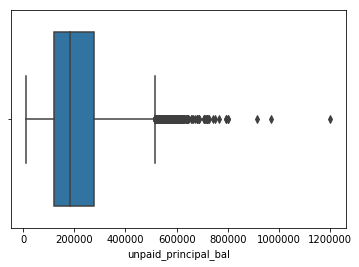

In [20]:
sns.boxplot(data.unpaid_principal_bal)

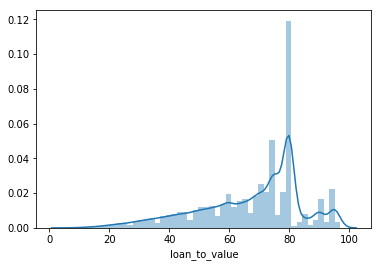

In [22]:
sns.distplot(data.loan_to_value)

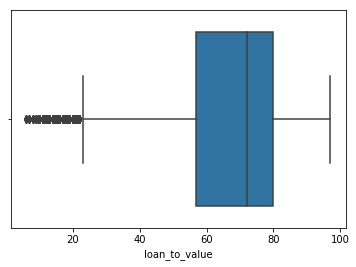

In [23]:
sns.boxplot(data.loan_to_value)

In [24]:
# data=data[negative_data['loan_to_value']>20].reset_index(drop=True) ## we can remove outlier 

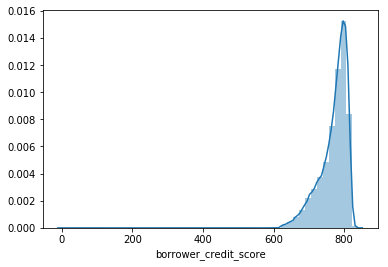

In [25]:
sns.distplot(data.borrower_credit_score)

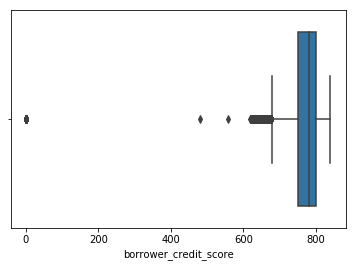

In [26]:
sns.boxplot(data.borrower_credit_score)

In [27]:
# data=data[data['borrower_credit_score']>700].reset_index(drop=True) 

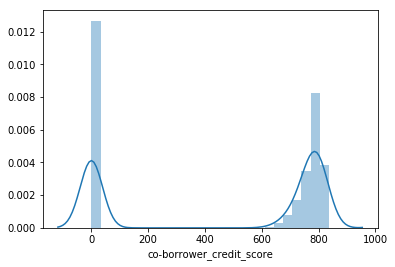

In [28]:
sns.distplot(data['co-borrower_credit_score'])

In [29]:
# data_cat=set(combine_data.columns)-set(combine_data._get_numeric_data().columns)

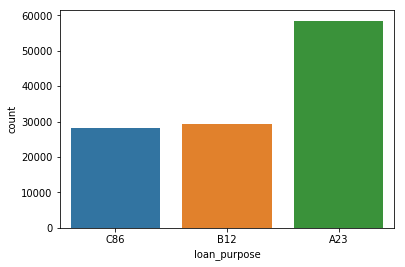

In [30]:
sns.countplot(data=data,x='loan_purpose')

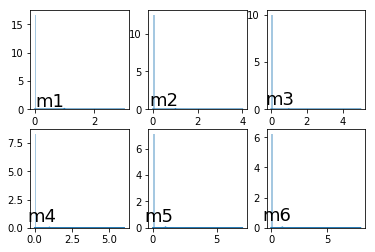

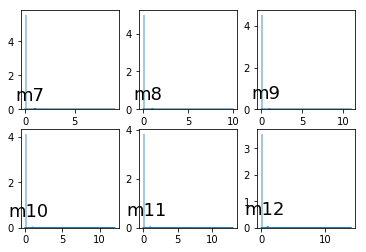

In [37]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.distplot(data.iloc[:,i+15].values)
    plt.text(0.5, 0.5,data.columns[i+15],fontsize=18, ha='center')
plt.show()
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.distplot(data.iloc[:,i+21].values)
    plt.text(0.5, 0.5,data.columns[i+21],fontsize=18, ha='center')
    

In [55]:
"""can we remove the outlier ?"""

dummy_data=data

dummy_data=dummy_data[dummy_data['interest_rate']<5].reset_index(drop=True)
dummy_data=dummy_data[dummy_data['interest_rate']>2.75].reset_index(drop=True)

dummy_data=dummy_data[dummy_data['unpaid_principal_bal']<500000].reset_index(drop=True) 


print("positive data after removeing outlier",dummy_data.m13.sum())

print("no of positive data remove",data.m13.sum()-dummy_data.m13.sum())
 
    
#'''a significant no of positive data is remove by outlier so here we don't remove out layer '''



('positive data after removeing outlier', 591)
('no of positive data remove', 45)


In [84]:
# more on Data Visualization

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

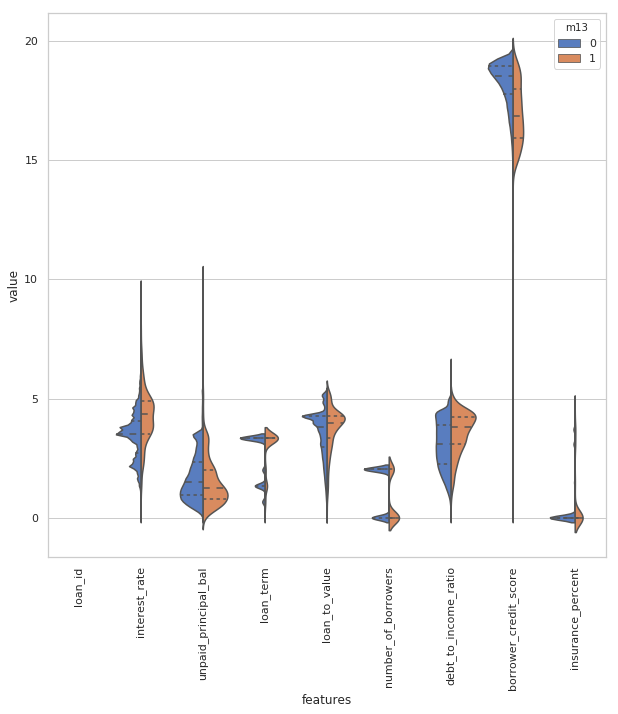

In [40]:
cateogrical_columns=['financial_institution',
 'first_payment_date',
 'loan_purpose',
 'origination_date',
 'source']
numrical_data=data.drop(columns=cateogrical_columns)
numrical_columns=numrical_data.columns

target=numrical_data['m13']
numrical_data=numrical_data.drop(columns=["loan_id",'m13'])

#scaling the numrical data
mean=numrical_data.min()
std=numrical_data.std()
numrical_data=(numrical_data-mean)/std


sns.set(style="whitegrid", palette="muted")
tar=pd.DataFrame(columns=["m13"],data=target)
tar.target=target
nm=pd.DataFrame(columns=numrical_columns,data=numrical_data)
data2 = pd.concat([tar,nm.iloc[:,0:9]],axis=1)
data2 = pd.melt(data2,id_vars="m13",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="m13", data=data2,split=True, inner="quart")
plt.xticks(rotation=90)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

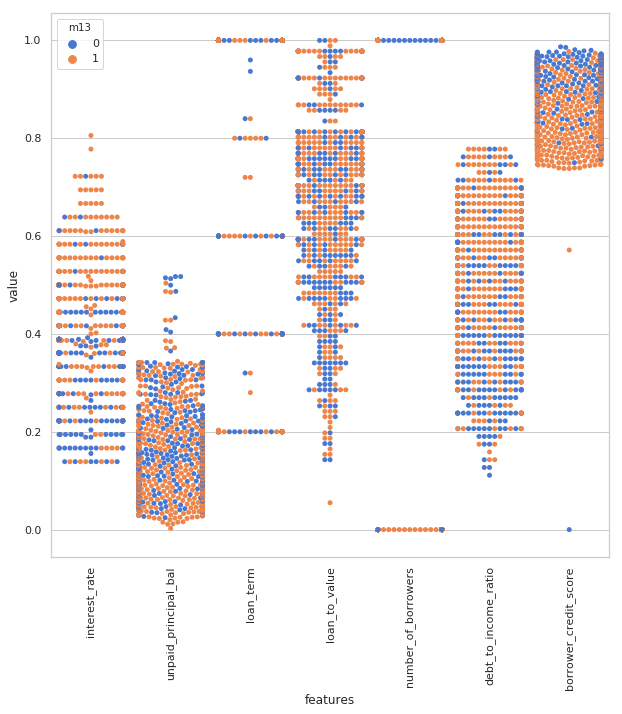

In [114]:
sns.set(style="whitegrid", palette="muted")
tar=pd.DataFrame(columns=["m13"],data=target)
tar.target=target
nm=pd.DataFrame(columns=numrical_columns,data=numrical_data)
data2 = pd.concat([tar,nm.iloc[:1000,0:7]],axis=1)       ## for 1000 data point 
data2 = pd.melt(data2,id_vars="m13",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="m13", data=data2)

plt.xticks(rotation=90)

In [ ]:
# its vary diffcult to anaylysis which feature data point can easy separate

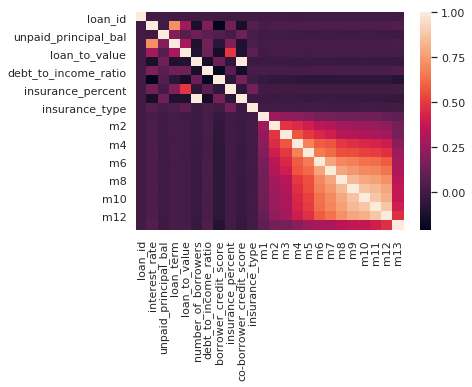

In [44]:
sns.heatmap(data.corr())

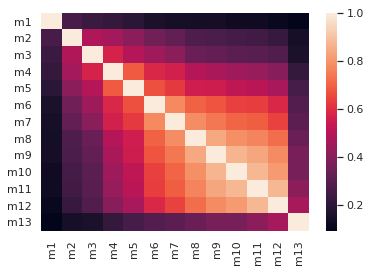

In [45]:
sns.heatmap(data.iloc[:,-13:].corr()) ## some are strong coreated to each

In [11]:
one_hot=ce.OneHotEncoder(handle_unknown="ignore",use_cat_names=True)
one_hot_X=one_hot.fit_transform(data)

In [12]:
target=data['m13']
one_hot_X=one_hot_X.drop(columns=["m13",'loan_id'],axis=1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(one_hot_X.values,target, test_size=0.1, random_state=42)
                # try differnt test_size and fix on 0.1 

In [14]:
x_train.shape ,y_train.sum()

((104452, 54), 569)

In [52]:
# def plot_2d_space(X, y, label='Classes'):   
#     colors = ['#1F77B4', '#FF7F0E']
#     markers = ['o', 's']
#     for l, c, m in zip(np.unique(y), colors, markers):
#         plt.scatter(
#             X[y==l, 0],
#             X[y==l, 1],
#             c=c, label=l, marker=m
#         )
#     plt.title(label)
#     plt.legend(loc='upper right')
#     plt.show()

In [ ]:
# differnt data balance  

In [15]:
from imblearn.combine import SMOTETomek ## upsampling and downsampling both
smt = SMOTETomek(ratio="auto")
X_smt, y_smt = smt.fit_sample(x_train, y_train)
#plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#cf=RandomForestClassifier()
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [6,7,8,9,10],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, ,500,600]
# }
#grid_search = GridSearchCV(estimator = cf, param_grid = param_grid,cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
#best parameter ---- criterion='entropy',max_depth=7,n_estimators=600,bootstrap=True

In [20]:
cf=RandomForestClassifier(criterion='entropy',max_depth=7,n_estimators=600,bootstrap=True)

In [22]:
cf.fit(X_smt,y_smt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1]:
#cf.score(x_test,y_test)

In [23]:
y_pred=cf.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11539
           1       0.53      0.45      0.48        67

   micro avg       0.99      0.99      0.99     11606
   macro avg       0.76      0.72      0.74     11606
weighted avg       0.99      0.99      0.99     11606



In [26]:
print(confusion_matrix(y_test,y_pred))

[[11512    27]
 [   37    30]]


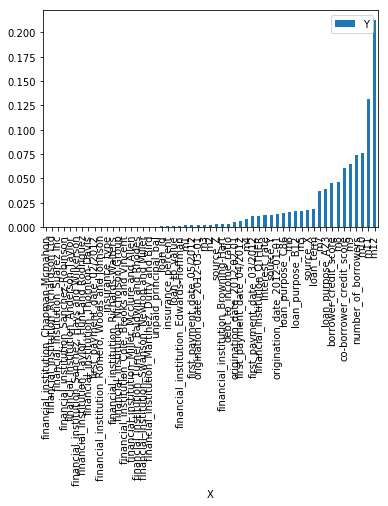

In [28]:
import matplotlib.pyplot as plt
fscores = pd.DataFrame({'X': list(x_one.columns), 'Y': list(cf.feature_importances_)})
fscores.sort_values(by='Y').plot.bar(x='X')

In [6]:
test_data=pd.read_csv("test.csv")

In [8]:
test_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [9]:
submission_file=pd.DataFrame()    ## new data frame
submission_file['loan_id']=test_data.loan_id

test_data=test_data.drop(columns=['loan_id'])
test_data=one.fit_transform(test)
y_pred=cf.predict(test_data.values)

submission_file['m13']=y_pred

In [40]:
y_pred.sum()

157

In [34]:
submission_file.to_csv("final_SMOTE_RF.csv",index=False)  #final file 

# public score -0.34042
# PB -0.55769
# Leaderboard rank -48

In [40]:
import imblearn

In [41]:
imblearn.__version__

'0.4.3'